In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv("adapters.csv")

In [3]:
df["BERT_score"][1]

'(tensor([0.9985]), tensor([0.9985]), tensor([0.9985]), tensor([0.9985]))'

In [7]:
cond = lambda x: round(float(x.split(', ')[2].lstrip(' tensor([').rstrip(')]')),3)
df["BERT_score"] = df["BERT_score"].apply(cond)

In [8]:
df

,Before Bug fix,After Bug fix,Location,Bug type,Commit Message,Project URL,File Path,Fixed Commit,Buggy Commit,Test File,Coding Effort,Constructs,Lizard Features Buggy,Lizard Features Fixed,BLEU,crystalBLEU_score,BERT_score
0,"238 AdapterType,\n239 get_adap...","238 AdapterType,\n239 get_adap...",Before: 243\nAfter: 243,add init_adapters_config to _import_structure,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/__init__.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,1304,"{'module': 1, 'ERROR': 3, 'expression_statemen...",{},{},0.867501,0.859685,0.987
1,93 ForwardContext.get_contexts().pop()...,93 ForwardContext.get_contexts().pop()...,Before: 103\nAfter: 103,fix typo in `forwardcontext.wrapper_func`,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/context.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,617,"{'module': 1, 'expression_statement': 6, 'call...","{'cyclomatic_complexity': 4, 'nloc': 7, 'token...","{'cyclomatic_complexity': 4, 'nloc': 7, 'token...",0.990030,0.989208,0.999
2,716 if self.active_head == head_name:\...,718 if self.active_head == head_name:\...,Before: 803\nAfter: 805,fix a bug in modelwithflexibleheadsadaptersmix...,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/heads/base.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,7109,"{'module': 1, 'if_statement': 14, 'if': 17, 'c...","{'cyclomatic_complexity': 2, 'nloc': 2, 'token...","{'cyclomatic_complexity': 2, 'nloc': 2, 'token...",0.772538,0.771440,0.988
3,716 if self.active_head == head_name:\...,718 if self.active_head == head_name:\...,Before: 805\nAfter: 807,fix a bug in modelwithflexibleheadsadaptersmix...,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/heads/base.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,7151,"{'module': 1, 'if_statement': 14, 'if': 17, 'c...","{'cyclomatic_complexity': 2, 'nloc': 2, 'token...","{'cyclomatic_complexity': 2, 'nloc': 2, 'token...",0.772538,0.771440,0.988
4,"329 # In the old format, task adapters e.g...","329 # In the old format, task adapters e.g...","Before: 339, 340, 341, 342\nAfter: 339, 340, 3...",remove invertible adapter from config and adap...,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/loading.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,2597,"{'module': 1, 'comment': 4, 'function_definiti...","{'cyclomatic_complexity': 1, 'nloc': 4, 'token...","{'cyclomatic_complexity': 1, 'nloc': 4, 'token...",0.941146,0.938540,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,"91 for i, layer in enumerate(self.visi...","91 for i, layer in enumerate(self.visi...",Before: 98\nAfter: 98,fix typo in clip/mixin_clip.py,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/models/clip/mixin_clip.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,867,"{'module': 1, 'for_statement': 3, 'for': 3, 'p...","{'cyclomatic_complexity': 1, 'nloc': 5, 'token...","{'cyclomatic_complexity': 1, 'nloc': 5, 'token...",0.862795,0.852701,0.985
932,"91 for i, layer in enumerate(self.visi...","91 for i, layer in enumerate(self.visi...",Before: 101\nAfter: 101,fix typo in clip/mixin_clip.py,Separate adapters config from model config (#31),https://github.com/adapter-hub/adapters,src/adapters/models/clip/mixin_clip.py,b06d69bedd10592ba1187df844c5752c8213ce55,234c7083f9daef39a147c1848dc99bdd39870c20,0,912,"{'module': 1, 'for_statement': 3, 'for': 3, 'p...","{'cyclomatic_complexity': 1, 'nloc': 5, 'token...","{'cyclomatic_complexity': 1, 'nloc': 5, 'token...",0.862795,0

In [23]:
df_analysis = df[["Before Bug fix", "After Bug fix", "Location", "Bug type", "Commit Message", "BLEU", "crystalBLEU_score", "BERT_score"]]
# randomly select 15 rows from the dataframe in which the before bug fix has not more than 25 lines
df_analysis = df_analysis.sample(15)
df_analysis[["Bug type", "Commit Message"]].to_csv("bug_type_commit_message.csv", index=False)

In [11]:
# Statistical summary for Coding Effort, BLEU, and crystalBLEU_score
coding_effort_stats = df['Coding Effort'].describe()
bleu_stats = df['BLEU'].describe()
crystalbleu_stats = df['crystalBLEU_score'].describe()
bert_stats = df['BERT_score'].describe()

print("Coding Effort Statistics:")
print(coding_effort_stats)
print("\nBLEU Score Statistics:")
print(bleu_stats)
print("\ncrystalBLEU Score Statistics:")
print(crystalbleu_stats)
print("\nBERT Score Statistics:")
print(bert_stats)

Coding Effort Statistics:
count      936.000000
mean      1950.104701
std       2147.798305
min          9.000000
25%        296.750000
50%       1277.500000
75%       2988.000000
max      11839.000000
Name: Coding Effort, dtype: float64

BLEU Score Statistics:
count     9.360000e+02
mean      6.734590e-01
std       2.009232e-01
min      2.358026e-155
25%       5.754079e-01
50%       6.646360e-01
75%       7.926150e-01
max       1.000000e+00
Name: BLEU, dtype: float64

crystalBLEU Score Statistics:
count    936.000000
mean       0.663869
std        0.206381
min        0.000000
25%        0.558510
50%        0.658934
75%        0.780311
max        1.000000
Name: crystalBLEU_score, dtype: float64

BERT Score Statistics:
count    936.000000
mean       0.951931
std        0.043731
min        0.628000
25%        0.942000
50%        0.956000
75%        0.978000
max        1.000000
Name: BERT_score, dtype: float64


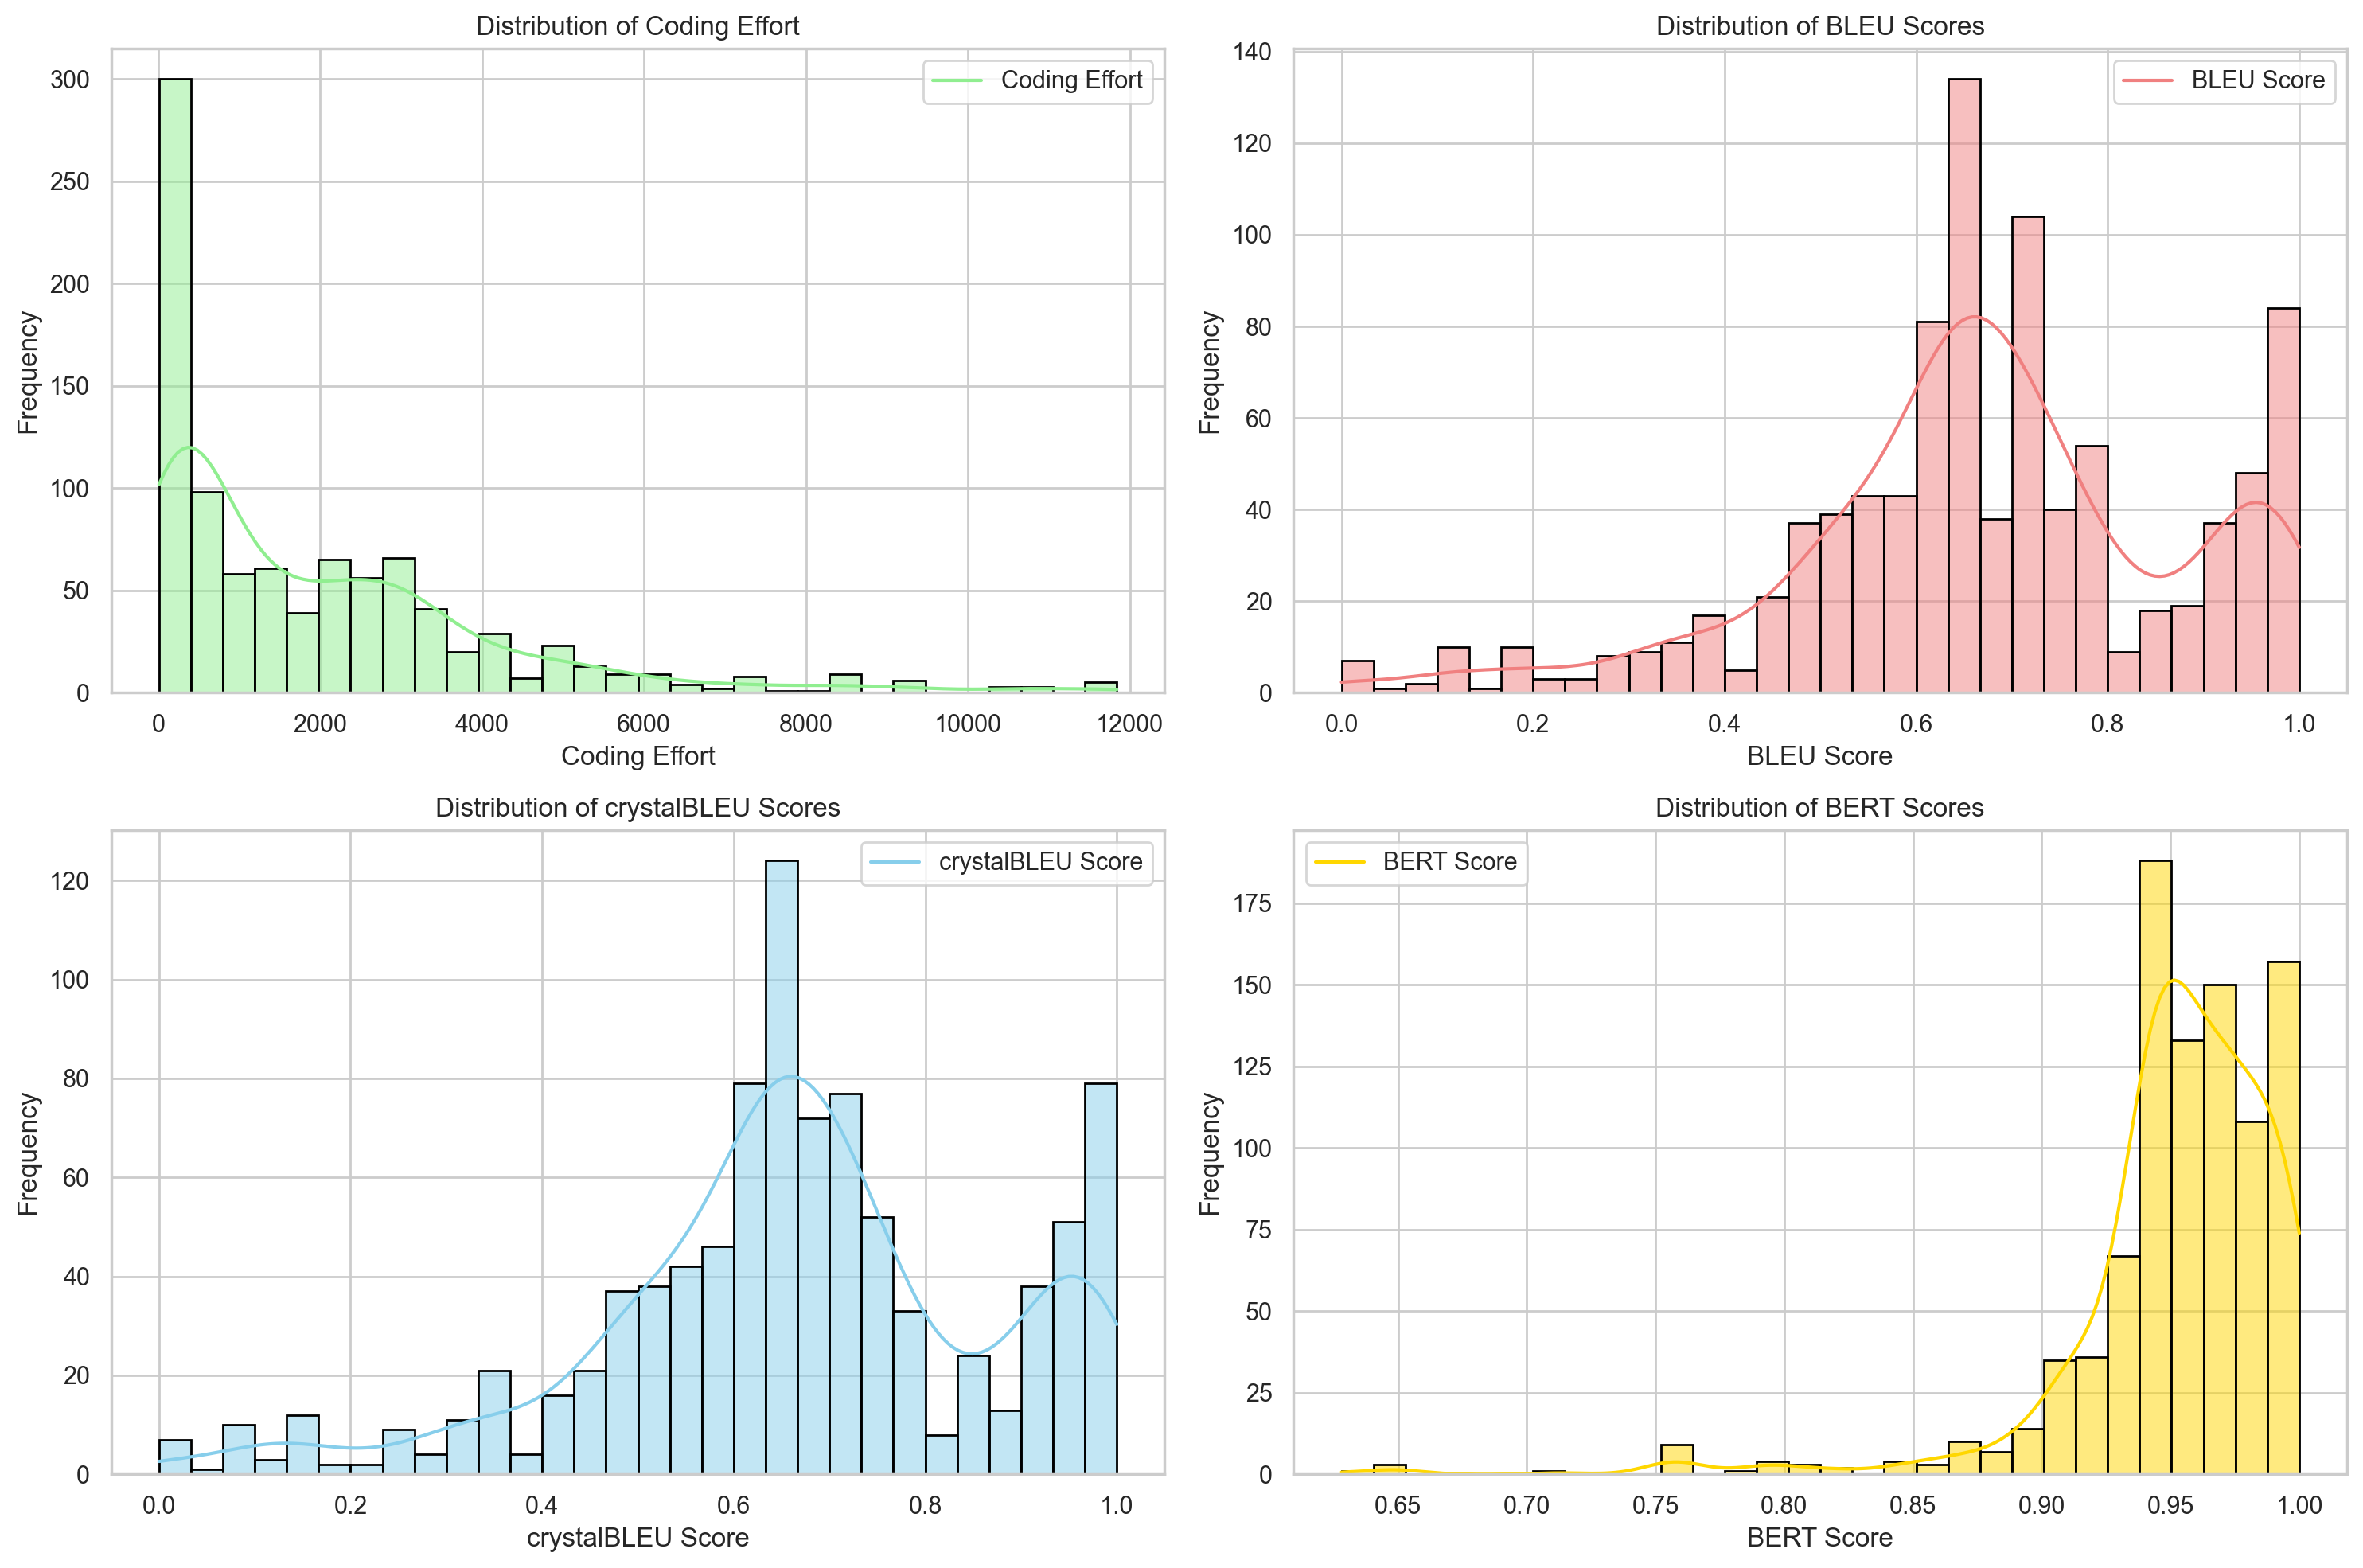

In [49]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(df['Coding Effort'], bins=30, kde=True, edgecolor='black', color='lightgreen', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Coding Effort')
axs[0, 0].set_xlabel('Coding Effort')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend(['Coding Effort'])

sns.histplot(df['BLEU'], bins=30, kde=True, edgecolor='black', color='lightcoral', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of BLEU Scores')
axs[0, 1].set_xlabel('BLEU Score')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend(['BLEU Score'])

sns.histplot(df['crystalBLEU_score'], bins=30, kde=True, edgecolor='black', color='skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of crystalBLEU Scores')
axs[1, 0].set_xlabel('crystalBLEU Score')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend(['crystalBLEU Score'])

sns.histplot(df['BERT_score'], bins=30, kde=True, edgecolor='black', color='gold', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of BERT Scores')
axs[1, 1].set_xlabel('BERT Score')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend(['BERT Score'])

plt.tight_layout()
plt.savefig("histogram.png", dpi=600)
plt.show()


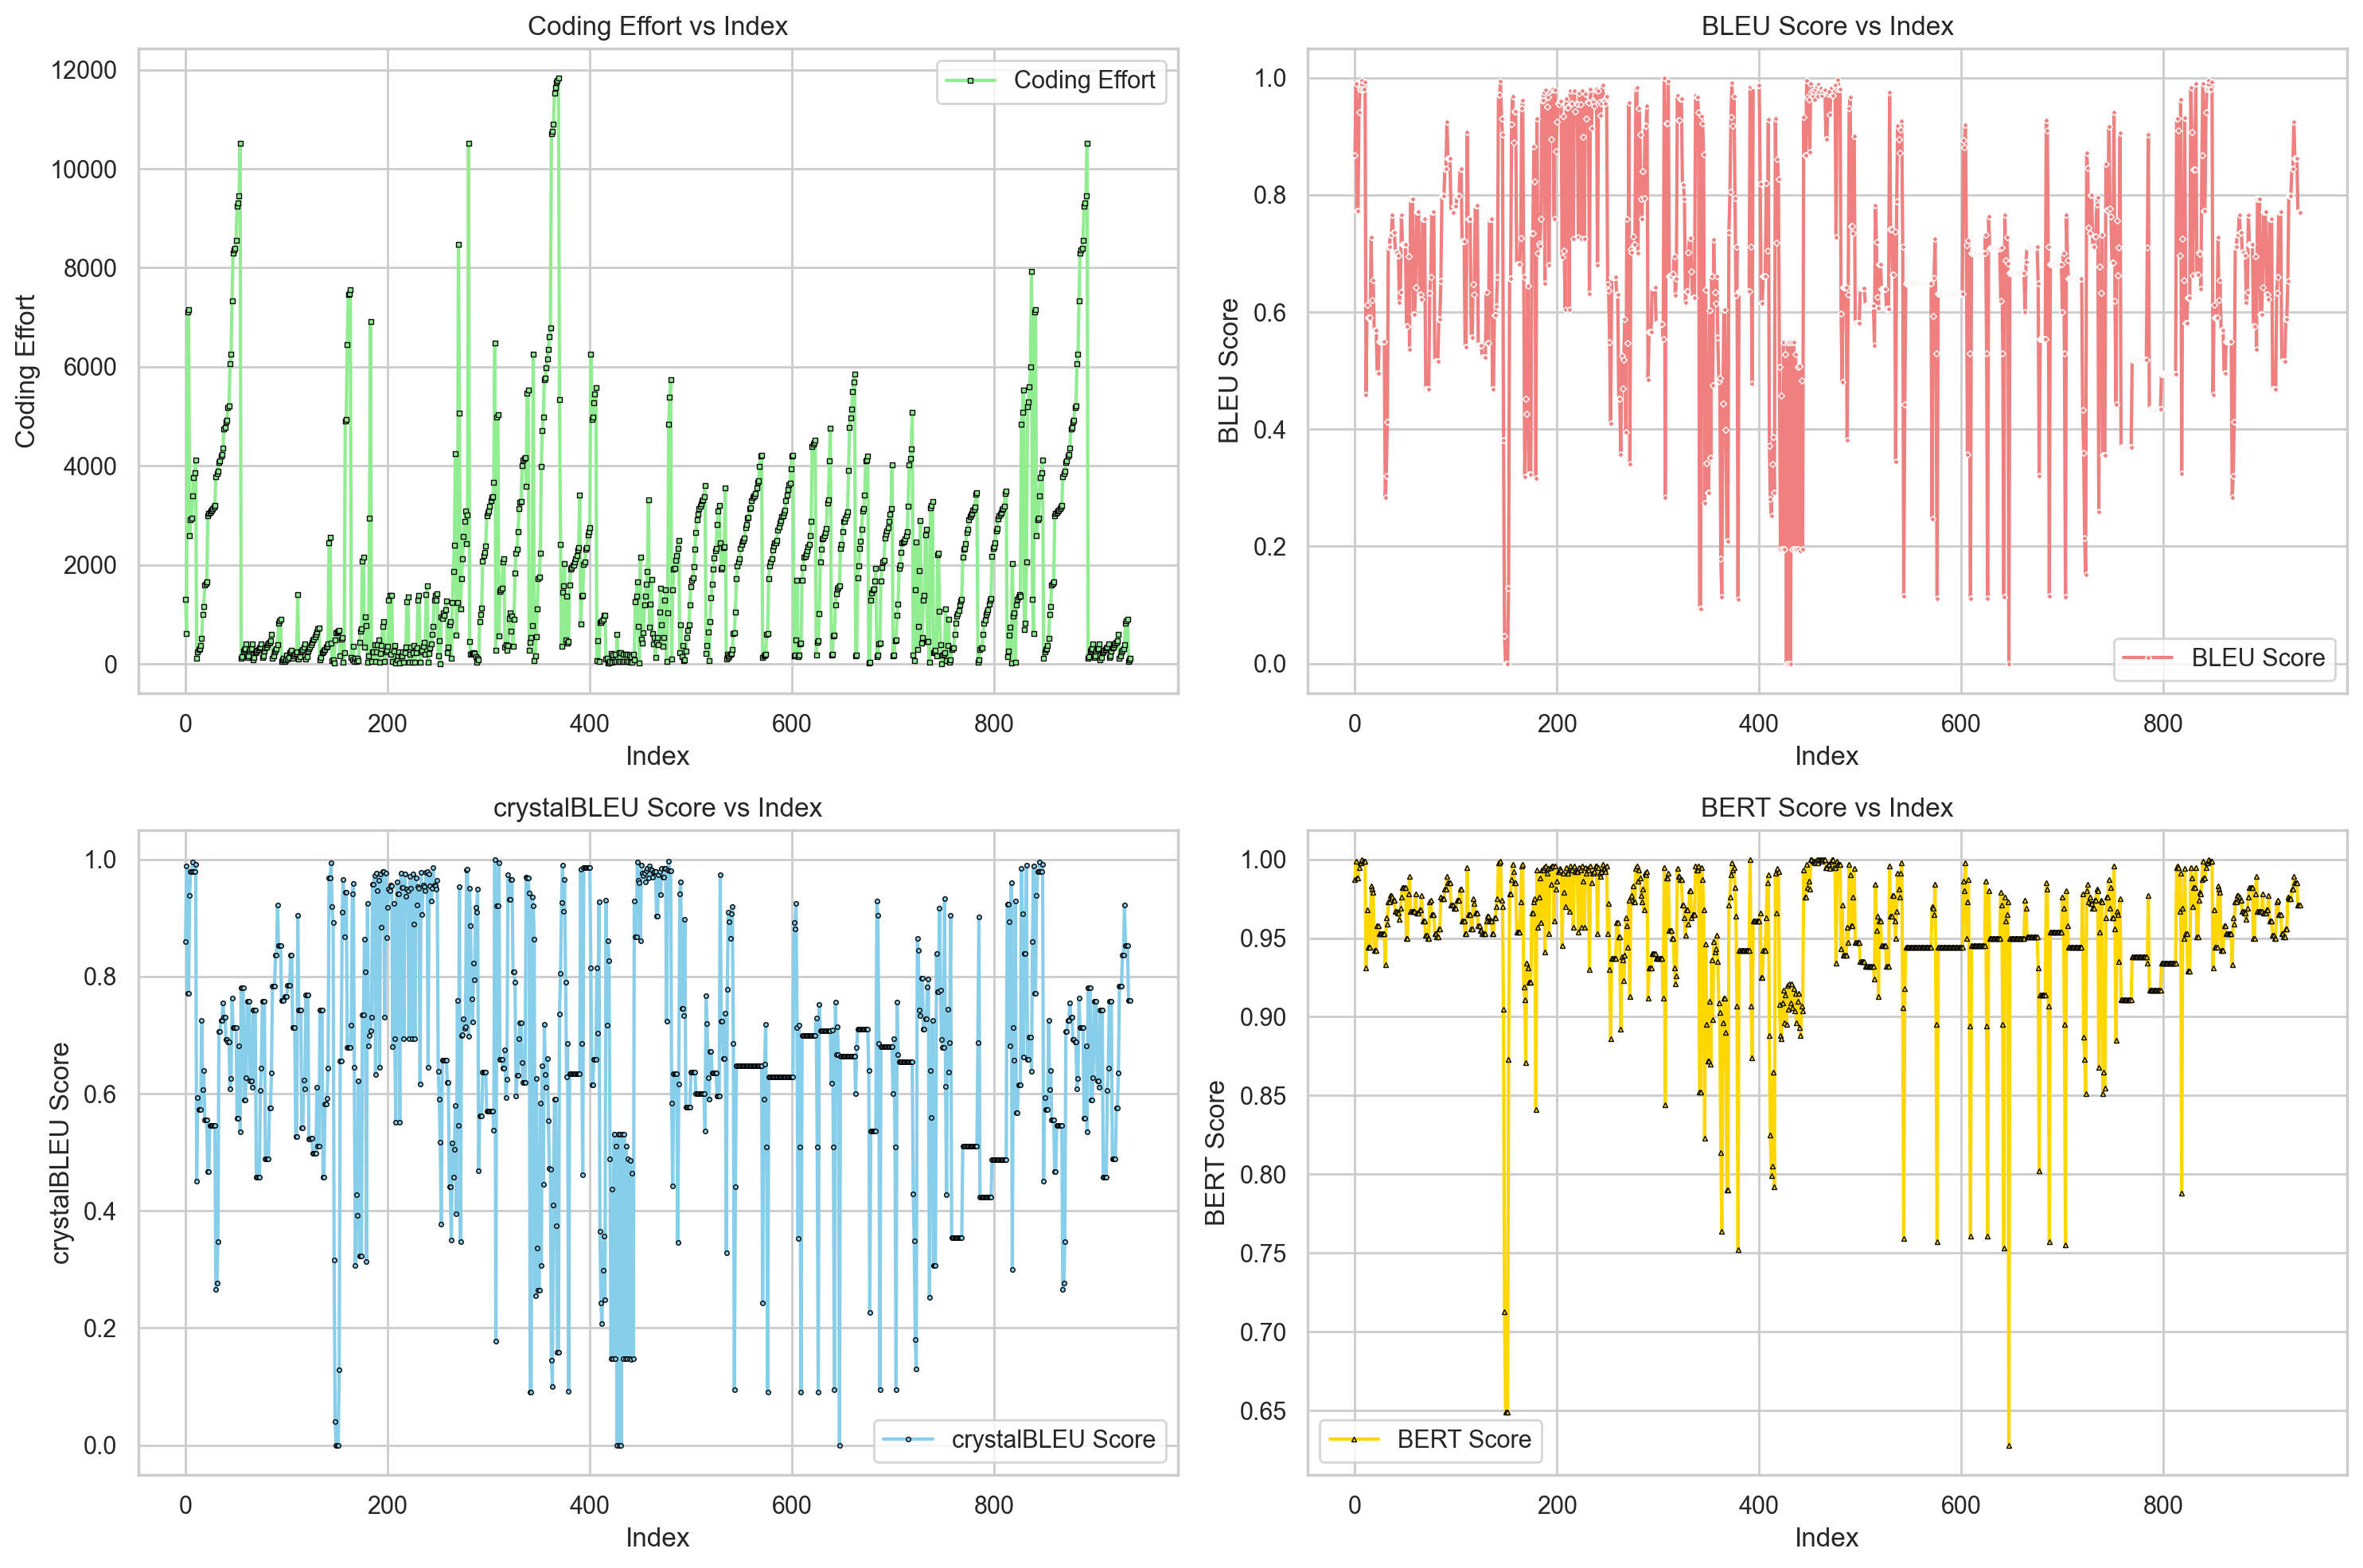

In [50]:
# plot these 4 metrics as time chart for each bug fix

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=df.index, y=df['Coding Effort'], label='Coding Effort', color='lightgreen', marker='s', markersize=2, markeredgewidth=0.5, markeredgecolor="black", ax=axs[0, 0])
axs[0, 0].set_title('Coding Effort vs Index')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Coding Effort')

sns.lineplot(x=df.index, y=df['BLEU'], label='BLEU Score', color='lightcoral', marker='D', markersize=2, markeredgewidth=0.5, ax=axs[0, 1])
axs[0, 1].set_title('BLEU Score vs Index')
axs[0, 1].set_xlabel('Index')
axs[0, 1].set_ylabel('BLEU Score')

sns.lineplot(x=df.index, y=df['crystalBLEU_score'], label='crystalBLEU Score', color='skyblue', marker='o', markersize=2, markeredgewidth=0.5, markeredgecolor="black", ax=axs[1, 0])
axs[1, 0].set_title('crystalBLEU Score vs Index')
axs[1, 0].set_xlabel('Index')
axs[1, 0].set_ylabel('crystalBLEU Score')

sns.lineplot(x=df.index, y=df['BERT_score'], label='BERT Score', color='gold', marker='^', markersize=2, markeredgewidth=0.5, markeredgecolor="black", ax=axs[1, 1])
axs[1, 1].set_title('BERT Score vs Index')
axs[1, 1].set_xlabel('Index')
axs[1, 1].set_ylabel('BERT Score')

plt.tight_layout()
plt.savefig("time_chart.png", dpi=600)
plt.show()

In [57]:
# show row with maximum coding effort
top_10_coding_efforts = df.nlargest(10, 'Coding Effort')
top_10_coding_efforts.to_csv("top_10_coding_efforts.csv", index=True)
print("Rows with top 10 coding efforts:")
display(top_10_coding_efforts)


Rows with top 10 coding efforts:


,Before Bug fix,After Bug fix,Location,Bug type,Commit Message,Project URL,File Path,Fixed Commit,Buggy Commit,Test File,Coding Effort,Constructs,Lizard Features Buggy,Lizard Features Fixed,BLEU,crystalBLEU_score,BERT_score
369,1527 custom_weights_loaders.append...,"1600 **kwargs,\n1601 )\n16...",Before: 1534\nAfter: 1613,add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,11839,"{'module': 1, 'expression_statement': 5, 'call...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.208976,0.159053,0.790
368,1527 custom_weights_loaders.append...,"1600 **kwargs,\n1601 )\n16...","Before: 1530\nAfter: 1606, 1607, 1608, 1609",add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,11790,"{'module': 1, 'expression_statement': 5, 'call...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.208976,0.159053,0.790
367,1512 loader = PredictionHeadLoader...,1575 loader = PredictionHeadLoader...,"Before: 1527, 1528\nAfter: 1591, 1592, 1593, 1...",add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,11759,"{'module': 1, 'expression_statement': 5, 'assi...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.398445,0.374751,0.890
366,1473 custom_weights_loaders=cu...,1532 use_safetensors=use_safet...,Before: 1512\nAfter: 1575,add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,11641,"{'module': 1, 'ERROR': 2, 'expression_statemen...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.604081,0.590892,0.912
365,1473 custom_weights_loaders=cu...,1532 use_safetensors=use_safet...,"Before: 1498\nAfter: 1559, 1560, 1561",add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,11520,"{'module': 1, 'ERROR': 2, 'expression_statemen...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.604081,0.590892,0.912
364,1387 loader = PredictionHeadLoader(sel...,1437 )\n1438 return loader.loa...,"Before: 1401\nAfter: 1452, 1453, 1454, 1460",add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,10898,"{'module': 1, 'expression_statement': 4, 'assi...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...","{'cyclomatic_complexity': 2, 'nloc': 5, 'token...",0.444079,0.410289,0.896
363,1383 loader = PredictionHeadLoader(sel...,1412 loader = PredictionHeadLoader(sel...,"Before: 1386, 1387\nAfter: 1415, 1416, 1417, 1...",add use_safetensors argument to modeladaptersm...,Support saving & loading via Safetensors (#692),https://github.com/adapter-hub/adapters,src/adapters/model_mixin.py,0c0e03434e5bf6c03eae7a331b9f6d65ad49724d,6ab81857ea65f887c933312eb120f095b66e216a,0,10757,"{'module': 1, 'expression_statement': 3, 'assi...","{'cyclomatic_complexity